The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:


1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:  

    ● name: the user's name  
    ● object_id: the user's id  
    ● email: email address     
    ● creation_source: how their account was created. This takes on one
    of 5 values:
        ○ PERSONAL_PROJECTS: invited to join another user's
    personal workspace  
        ○ GUEST_INVITE: invited to an organization as a guest
    (limited permissions)  
        ○ ORG_INVITE: invited to an organization (as a full member)
        ○ SIGNUP: signed up via the website  
        ○ SIGNUP_GOOGLE_AUTH: signed up using Google  
    Authentication (using a Google email account for their login
    id)  
    ● creation_time: when they created their account  
    ● last_session_creation_time: unix timestamp of last login  
    ● opted_in_to_mailing_list: whether they have opted into receiving
    marketing emails  
    ● enabled_for_marketing_drip: whether they are on the regular
    marketing email drip  
    ● org_id: the organization (group of users) they belong to  
    ● invited_by_user_id: which user invited them to join (if applicable).  


2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

We suggest spending 1-2
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
# read in data
df_users = pd.read_csv('takehome_users.csv', parse_dates=['creation_time'] , encoding='iso-8859-1')
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'],unit='s')
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
#Look at engagement data
df_engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=True, index_col=0, encoding='iso-8859-1')
df_engagement

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [5]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


In [6]:
#Resample daily visits by users
daily_engagement = df_engagement.groupby('user_id').apply(lambda x: x.visited.resample('D').sum())
daily_engagement

user_id  time_stamp
1        2014-04-22    1
2        2013-11-15    1
         2013-11-16    0
         2013-11-17    0
         2013-11-18    0
                      ..
11996    2013-09-06    1
11997    2013-01-15    1
11998    2014-04-27    1
11999    2012-06-02    1
12000    2014-01-26    1
Name: visited, Length: 522501, dtype: int64

In [7]:
#Check if any users logged in more than once a day
daily_engagement.max()

1

In [8]:
#Create a list with adopted users
adopted_users = []

#Extract users
all_users = df_engagement.user_id.unique()

#Determine which are the active users
for user in all_users:
    
    #Calculates max user engagement over continuous 7 day rolling period
    max_engagement = daily_engagement[user].sort_values().rolling(7).sum().max()
        
    if max_engagement >= 3: #if user used at least 3 times 
        adopted_users.append(user)

In [9]:
#Add the target column to the original dataframe with 'adopted' status
df_users['adopted'] = df_users['object_id'].isin(adopted_users)

### Identify which factors predict future user adoption

The first step here is to explore the available feature columns and either remove them or format them in a way that will make it so our model results are interpretable. The features that will be looked at are:
- email domain
- organization size
- invited_by_user
- creation source
- total time active

In [10]:
#Lets inspect email domains
df_users.email.apply(lambda x: x.split('@')[1]).value_counts()[0:6]#all other provider had counts >= 2

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
Name: email, dtype: int64

We might be able to use email provider as an additional feature - gustr, cuvox and jourrapide are all disposable email adress services 

In [11]:
#Adding a new feature called email provider
    # - 'regular' will be used for gmail, hotmail and yahoo; 
    # - 'disposable' will be used for disposable email services: gustr, cuvox and jourrapide
    # - 'other' for all others
email_provider_dict = {'gmail.com':'regular',
                       'hotmail.com':'regular',
                       'yahoo.com':'regular',
                       'jourrapide.com':'disposable',
                       'cuvox.de':'disposable',
                       'gustr.com':'disposable'}

df_users['email_provider'] = df_users.email.apply(lambda x: x.split('@')[1])
df_users['email_provider'] =  df_users['email_provider'].map(email_provider_dict).fillna('other')

In [12]:
#For the 'invited_by_user_id' column I will assume that a NaN means the user was not invited by another user
#NaNs will be set to False other values will be set to True

df_users['invited_by_user'] = (df_users['invited_by_user_id']).notnull()

In [13]:
#Now let's explore org_id data
print('Number of unique orgs:',len(df_users.org_id.unique()))
print('Median number of users per org:',np.median(df_users.org_id.value_counts().unique()))
print('Mean number of users per org:',np.mean(df_users.org_id.value_counts().unique()))
print('Max number of users for an org:',np.max(df_users.org_id.value_counts().unique()))
print('Min number of users for an org:',np.min(df_users.org_id.value_counts().unique()))

Number of unique orgs: 417
Median number of users per org: 43.0
Mean number of users per org: 56.653333333333336
Max number of users for an org: 319
Min number of users for an org: 2


With 417 unique organizations using this feature as a categorical variable would not yield easily interpretable results, we will be generating instead a new feature containing the number of users for the organization the user signed up for. This will provide the model with information regarding the size of the organization.

In [14]:
org_users_dict = (df_users.org_id.value_counts()).to_dict()
df_users['org_num_users'] = df_users['org_id'].map(org_users_dict)

In [15]:
from datetime import datetime

#Creation time and last session time need to be converted to ordinal to be used by the model

#first we remove rows for which "last_session_creation_time" is missing
df_users.dropna(subset=['last_session_creation_time'], inplace=True)

#Time information is converted to ordinal
df_users['creation_time']= df_users['creation_time'].apply(datetime.toordinal)
df_users['last_session_creation_time']= df_users['last_session_creation_time'].apply(datetime.toordinal)

#Creation time and last session creation time information can be used to calculate a time delta:
df_users['delta_time_active'] = df_users['last_session_creation_time'] - df_users['creation_time']

In [16]:
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,email_provider,invited_by_user,org_num_users,delta_time_active
0,1,735345,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,735345,1,0,11,10803.0,False,regular,True,75,0
1,2,735187,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,735323,0,0,1,316.0,True,disposable,True,233,136
2,3,734946,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,734946,0,0,94,1525.0,False,disposable,True,32,0
3,4,735009,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,735010,0,0,1,5151.0,False,regular,True,233,1
4,5,734885,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,734890,0,0,193,5240.0,False,regular,True,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,735117,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,735117,0,0,89,8263.0,False,disposable,True,40,0
11996,11997,734878,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,734883,0,0,200,NaN,False,regular,False,25,5
11997,11998,735350,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,735350,1,1,83,8074.0,False,disposable,True,27,0
11998,11999,734654,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,734656,0,0,6,NaN,False,other,False,138,2


In [17]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


#Dealing with categorical variables for the logistic regression model#
modified_df = df_users.drop(['object_id','name','email','org_id','invited_by_user_id','last_session_creation_time'],axis=1).copy()

#Getting dummies for creation_source and email_provider 
modified_df = pd.get_dummies(modified_df, columns=['creation_source'], drop_first=True)
modified_df = pd.get_dummies(modified_df, prefix=['email'], columns=['email_provider'], drop_first=True)

feature_cols = modified_df.drop('adopted', axis =1).columns

modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 13 columns):
creation_time                         8823 non-null int64
opted_in_to_mailing_list              8823 non-null int64
enabled_for_marketing_drip            8823 non-null int64
adopted                               8823 non-null bool
invited_by_user                       8823 non-null bool
org_num_users                         8823 non-null int64
delta_time_active                     8823 non-null int64
creation_source_ORG_INVITE            8823 non-null uint8
creation_source_PERSONAL_PROJECTS     8823 non-null uint8
creation_source_SIGNUP                8823 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    8823 non-null uint8
email_other                           8823 non-null uint8
email_regular                         8823 non-null uint8
dtypes: bool(2), int64(5), uint8(6)
memory usage: 482.5 KB


In [18]:
#Fit model and print results
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(modified_df[feature_cols]), columns = feature_cols)

logit = sm.Logit(list(modified_df['adopted']), features_scaled)

result = logit.fit()

print (result.summary())

Optimization terminated successfully.
         Current function value: 0.160674
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8823
Model:                          Logit   Df Residuals:                     8812
Method:                           MLE   Df Model:                           10
Date:                Mon, 27 Jul 2020   Pseudo R-squ.:                  0.7166
Time:                        15:08:34   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -5002.0
                                        LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
creation_time                          0.2842      0.053    

C:\Users\isado\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\isado\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\isado\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\isado\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [19]:
#Let's define the features of the model
features = ['creation_time', 'creation_source','last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'email_provider', 'invited_by_user', 'org_num_users','delta_time_active']
target = ['adopted']

In [20]:
print('\nODDS RATIOS\n')
print (np.exp(result.params).sort_values(ascending=False))


ODDS RATIOS

delta_time_active                     6513.666572
creation_time                            1.328641
email_regular                            1.202975
invited_by_user                          1.183843
opted_in_to_mailing_list                 1.068096
creation_source_PERSONAL_PROJECTS        1.057062
email_other                              1.049894
enabled_for_marketing_drip               0.984910
creation_source_SIGNUP                   0.922866
creation_source_ORG_INVITE               0.834548
creation_source_SIGNUP_GOOGLE_AUTH       0.832434
org_num_users                            0.573161
dtype: float64


The biggest factor predicting user adoption is the 'delta_time_active' variable, which was computed based on the amount of time spanned from when the user signed up to when the user last logged in. Let's verify this by creating a boxplot showing the adoption status vs the amount of active time.

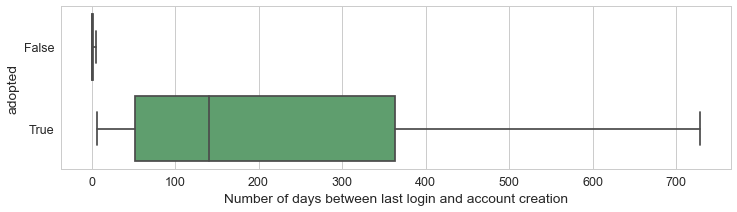

In [28]:
import seaborn as sns

plt.figure(figsize=(12, 3))
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
sns.boxplot(x ='delta_time_active', y='adopted', data=df_users, orient='h', showfliers = False)
plt.xlabel('Number of days between last login and account creation')
plt.show()

In [22]:
print('ADOPTED USERS\n',df_users[['delta_time_active']][df_users.adopted == True].describe())
print('NON ADOPTED USERS\n',df_users[['delta_time_active']][df_users.adopted == False].describe())

ADOPTED USERS
        delta_time_active
count        2243.000000
mean          227.611681
std           209.030702
min             6.000000
25%            52.000000
50%           141.000000
75%           364.000000
max           729.000000
NON ADOPTED USERS
        delta_time_active
count        6580.000000
mean            1.821277
std             4.420960
min             0.000000
25%             0.000000
50%             1.000000
75%             2.000000
max            62.000000


From the boxplot and summary above it can seen that the time elapsed is drastically different between the two classes and it can be nearly perfectly separated simply using an elapsed time cutoff of 16 days.

In [23]:
df_users[['delta_time_active']][df_users.adopted == False].quantile(q=0.98)

delta_time_active    18.0
Name: 0.98, dtype: float64

In [24]:
df_users[['delta_time_active']][df_users.adopted == True].quantile(q=0.02)

delta_time_active    13.0
Name: 0.02, dtype: float64

In [25]:
df_users[['adopted']][df_users.delta_time_active > 16].mean()

adopted    0.933535
dtype: float64

To explore which factors beyond active time are predictive of user adoption we drop the columns and generate a new logistic regression model

In [26]:
#Fit model and print results
feature_cols = modified_df.drop(['adopted','delta_time_active'], axis =1).columns

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(modified_df[feature_cols]), columns = feature_cols)

logit = sm.Logit(list(modified_df['adopted']), features_scaled)

result = logit.fit()

print (result.summary())

Optimization terminated successfully.
         Current function value: 0.682777
         Iterations 30
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8823
Model:                          Logit   Df Residuals:                     8813
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Jul 2020   Pseudo R-squ.:                 -0.2043
Time:                        15:08:35   Log-Likelihood:                -6024.1
converged:                       True   LL-Null:                       -5002.0
                                        LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
creation_time                         -0.1353      0.022   

In [27]:
print('\nODDS RATIOS\n')
print (np.exp(result.params).sort_values(ascending=False))


ODDS RATIOS

invited_by_user                       1.101616
email_regular                         1.058894
email_other                           1.042627
creation_source_PERSONAL_PROJECTS     1.040627
opted_in_to_mailing_list              1.011000
enabled_for_marketing_drip            1.003095
creation_source_SIGNUP_GOOGLE_AUTH    0.930592
creation_source_SIGNUP                0.922257
creation_source_ORG_INVITE            0.874501
creation_time                         0.873496
org_num_users                         0.806719
dtype: float64
